<a href="https://colab.research.google.com/github/dhakaraman/ML-Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Normalising data using minmax scaler and we have scaled data between 0-1
def normalise(df):
    #https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
    scaler = MinMaxScaler()
    numeric = ['Open','High','Low', 'Close', 'Volume']   #normalising the columns which are numeric in nature
    df[numeric] = scaler.fit_transform(df[numeric])

    return df


#preprocessing the data for training dataset using moving avg
def preprocessData(file):
    df = pd.read_csv(file)    #reading the csv file
    df.dropna(inplace=True)   #dropping the data points which have nan values
    df = normalise(df)        #normalizing the data using MinMaxScaler and scaling it in between 0-1
    mavg_data = df.rolling(window=25).mean()   #Taking average of 25 data points, so each time we get a new point we discard the earliest one
    mavg_data = mavg_data[25 : ]
    X = mavg_data.drop(labels = ['Close', 'Volume', 'Adj Close'], axis=1)   #dropping close, volume and adj close columns
    y = mavg_data['Close']   #we will predict/analyse close values
    return X, y
#preprocessing the data for testing dataset without using moving avg
def preprocessDataTest(file):
    df = pd.read_csv(file)   #reading the csv file
    df.dropna(inplace=True)  #dropping the data points which have nan values
    df = normalise(df)       #normalizing the data using MinMaxScaler and scaling it in between 0-1
    mavg_data = df
    X = mavg_data.drop(labels = ['Date','Close', 'Volume', 'Adj Close'], axis=1) #dropping date,close, volume and adj close columns
    y = mavg_data['Close']   #we will predict/analyse close values
    return X, y

Here we are creating train and test datasets, creating models,  plotting as well as visualising results for LSTM model on various companies.

Epoch 1/100
39/39 [==============================] - 7s 10ms/step - loss: 0.0653
Epoch 2/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0044
Epoch 3/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 4/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 5/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 6/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 7/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 8/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 9/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 10/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 11/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 12/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 13/100
39/39 [=======

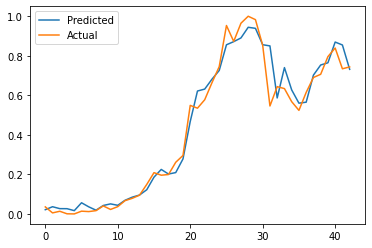

Epoch 1/100
39/39 [==============================] - 7s 10ms/step - loss: 0.1067
Epoch 2/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 3/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 4/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 5/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 6/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 7/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 8/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 9/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 10/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 11/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 12/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 13/100
39/39 [=====

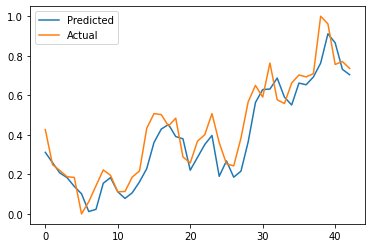

Epoch 1/100
39/39 [==============================] - 6s 9ms/step - loss: 0.0708
Epoch 2/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 3/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 4/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 5/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 6/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 7/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 8/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 9/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 11/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 12/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 13/100
39/39 [===============

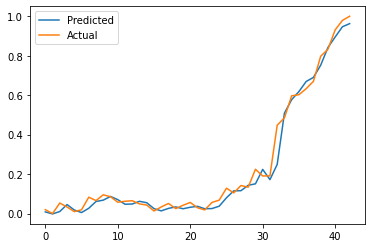

Epoch 1/100
38/38 [==============================] - 7s 10ms/step - loss: 0.1514
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0032
Epoch 8/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 13/100
38/38 [=====

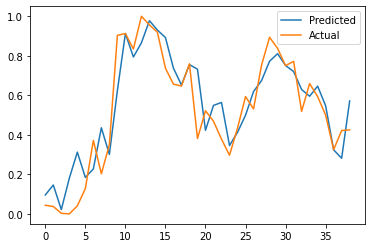

Epoch 1/100
38/38 [==============================] - 7s 11ms/step - loss: 0.0704
Epoch 2/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 4/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 5/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 7/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 8/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 9/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 13/100
38/38 [======

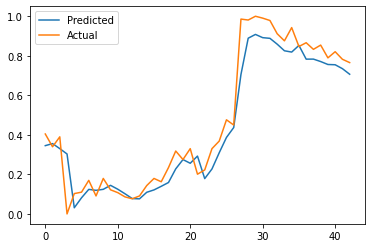

In [ ]:
#companies on which the model is being trained 
companies = ['TSLA', 'AMZN', 'COKE', 'THOMASCOOK', 'TCS']

#training our model using LSTM, in each iteration the model is being trained and tested on one company 
for com in companies:
    # obtaining testing and training data
    X_train,y_train = preprocessData("/content/"+ com+".csv")
    
    # obtaining testing and training data
    X_test, y_test = preprocessDataTest("/content/"+ com+"_test.csv")

    # Creating a Sequential Model for LSTM
    model = Sequential()
    # The following were the best set of parameters obtained after trial and error.
    
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.25))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.25))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.25))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.25))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the LSTM
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the LSTM to the Training set
    model.fit(X_train, y_train, epochs = 100, batch_size = 32)
    predict = model.predict(X_test)

    plt.plot(predict, label="Predicted")

    y_test = y_test.reset_index(drop=True)
    plt.plot(y_test, label="Actual")
    plt.legend()
    plt.show()

Epoch 1/50
35/35 [==============================] - 7s 47ms/step - loss: 0.0434 - val_loss: 0.1373
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0052 - val_loss: 4.3171e-04
Epoch 3/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 5.4763e-04
Epoch 4/50
35/35 [==============================] - 0s 10ms/step - loss: 8.5917e-04 - val_loss: 1.3556e-05
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 9.5267e-04
Epoch 6/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 8/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 6.3732e-04
Epoch 9/50
35/35 [==============================] - 0s 10ms/step - loss: 9.5748e-04 - val_loss: 4.2611e-04
Epoch 10/50
35/35 [==============================] - 0s 10ms/step - loss: 8.5

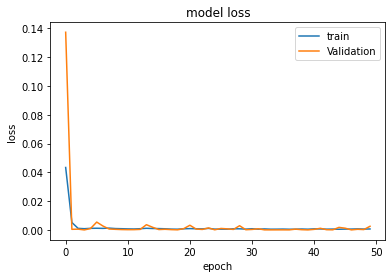

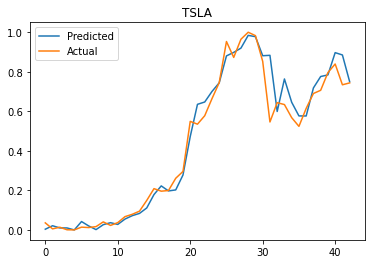

Epoch 1/50
35/35 [==============================] - 8s 50ms/step - loss: 0.0925 - val_loss: 0.1212
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0160 - val_loss: 0.0048
Epoch 3/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 2.2199e-04
Epoch 4/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 5/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 6/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 8.8155e-04
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 1.5926e-04
Epoch 8/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 2.2326e-04
Epoch 9/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 10/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 

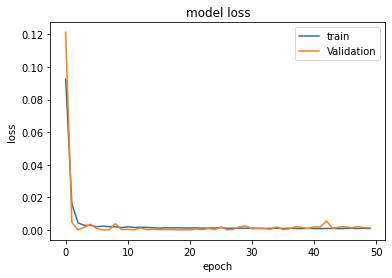

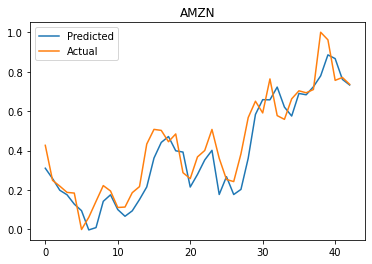

Epoch 1/50
35/35 [==============================] - 8s 49ms/step - loss: 0.0483 - val_loss: 0.1648
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0118 - val_loss: 0.0011
Epoch 3/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0051
Epoch 4/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 5/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 4.7532e-04
Epoch 6/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 3.1503e-04
Epoch 8/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/50
35/35 [==============================] - 0s 10ms/step - loss: 9.8626e-04 - val_loss: 8.5581e-04
Epoch 10/50
35/35 [==============================] - 0s 11ms/step - loss: 9.9049e-04 - val_lo

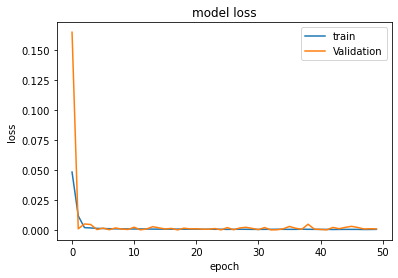

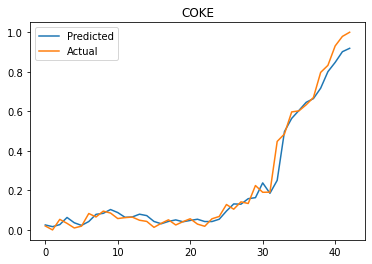

Epoch 1/50
34/34 [==============================] - 8s 74ms/step - loss: 0.1770 - val_loss: 0.0175
Epoch 2/50
34/34 [==============================] - 0s 10ms/step - loss: 0.0354 - val_loss: 0.0050
Epoch 3/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0107 - val_loss: 8.9895e-04
Epoch 4/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0066 - val_loss: 8.6628e-04
Epoch 5/50
34/34 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 5.2744e-04
Epoch 6/50
34/34 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 7.1762e-05
Epoch 7/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0046 - val_loss: 3.7950e-04
Epoch 8/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0040 - val_loss: 2.2160e-05
Epoch 9/50
34/34 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 4.7467e-04
Epoch 10/50
34/34 [==============================] - 0s 10ms/step - loss: 0.0039 

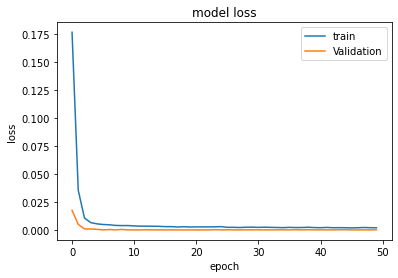

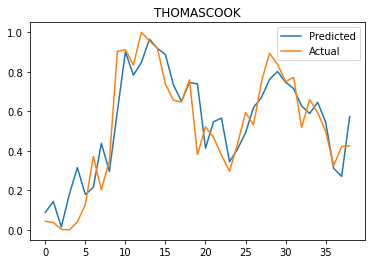

Epoch 1/50
34/34 [==============================] - 7s 52ms/step - loss: 0.0555 - val_loss: 0.1902
Epoch 2/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0138 - val_loss: 0.0062
Epoch 3/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 1.3094e-04
Epoch 4/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 5/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 6/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 7/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 2.3183e-04
Epoch 8/50
34/34 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 3.1788e-04
Epoch 9/50
34/34 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 3.1004e-04
Epoch 10/50
34/34 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 

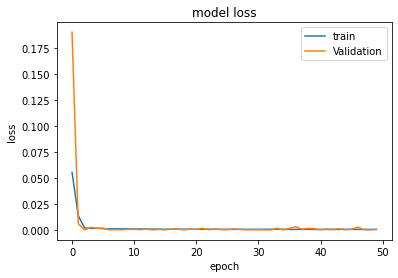

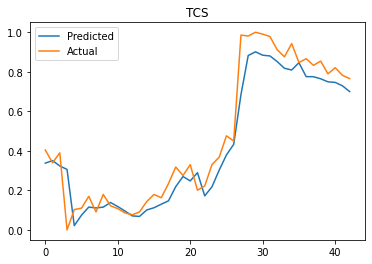

In [ ]:
companies = ['TSLA', 'AMZN', 'COKE', 'THOMASCOOK', 'TCS']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rms = dict()

for com in companies:
    # obtaining testing and training data
    X_train,y_train = preprocessData("/content/"+ com+".csv")
    
    # obtaining testing and training data
    X_test, y_test = preprocessDataTest("/content/"+ com+"_test.csv")

    # Creating a Sequential Model for LSTM
    # The following were the best set of parameters obtained after trial and error.
    model = Sequential()
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.25))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.25))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.25))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.25))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the LSTM
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split=0.10)
    predict = model.predict(X_test)
    print("For comapny "+ com + str(mean_squared_error(y_test, predict, squared=True)))
    print("For comapny "+ com + str(r2_score(y_test, predict)))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'])
    plt.savefig(com+'-training-loss-curve.png')
    plt.show()
    
    plt.plot(predict, label="Predicted")

    y_test = y_test.reset_index(drop=True)
    plt.plot(y_test, label="Actual")
    plt.title(str(com))
    plt.legend()
    plt.savefig(com+'-Future-prediction-curve.png')
    plt.show()